In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
import json
import pickle
import powerlaw as pwl
from sklearn.linear_model import LinearRegression

sns.set_style("darkgrid")
sns.set_palette("colorblind")

In [2]:
def get_count_from_file(filepath):
    """ Opens filepath and returns a numpy array with the results count """

    if filepath.endswith("pkl"):
        with open(filepath, "rb") as f:
            data = pickle.load(f)

        counts = []
        for k in data:
            counts.append([c for _, c in k])

        return np.array(counts)
    else:
        with open(filepath, "r") as f:
            return json.load(f)

In [3]:
def plot_bars_results(counts, ignore_first_ks=0):
    """ Plots the results count from the given file.
     :param filename: name of the file to be plotted """

    count = np.mean(counts, axis=1)

    start, end = ignore_first_ks, len(count)
    count = count[ignore_first_ks:]

    plt.figure(figsize=(12, 4))
    plt.bar(range(start, end), count, color='C1', alpha=0.5, edgecolor='none')
    plt.plot(range(start, end), count, color="C1", marker='o')
    # plt.fill_between(range(start, end),
    #                  (count - np.std(counts, axis=1)[ignore_first_ks:]),
    #                  (count + np.std(counts, axis=1)[ignore_first_ks:]),
    #                  color="C1", linestyle="--", alpha=0.5)

    plt.xlabel("Quantidade de k's")
    plt.ylabel("Quantidade de resultados")
    plt.xticks(range(start, end), [str(k+1) for k in range(start, end)])

    plt.tight_layout()
    plt.show()

In [135]:
def plot_logscale_results(counts, ignore_first_ks=0):
    """ Plots the results count from the given file.
     :param filename: name of the file to be plotted """

    count = np.mean(counts, axis=1)

    start, end = ignore_first_ks, len(count)
    count = count[ignore_first_ks:]

    plt.figure(figsize=(12, 4))
    plt.plot(range(start, end), count, color="C1", marker='o', label="Data")

    # fit linear regression
    xmin = 9
    x = np.log(range(start, end)).reshape(-1, 1)
    y = np.log(count).reshape(-1, 1)
    reg = LinearRegression().fit(x[xmin:], y[xmin:])
    print(f"alpha: {reg.coef_[0][0]}, beta: {reg.intercept_[0]}")
    plt.plot(range(xmin, end), np.exp(reg.predict(np.log(range(xmin, end)).reshape(-1, 1))), color="C0", linestyle="--", label="Linear Regression")

    plt.xticks(range(start, end), [str(k + 1) for k in range(start, end)])
    plt.xlabel("Quantidade de k's")
    plt.ylabel("Quantidade de resultados")
    plt.yscale("log")
    plt.xscale("log")
    plt.legend()
    plt.tight_layout()

In [136]:
def display_snippets(filename, pos=0):
    """ Displays the snippets from the given file.
     :param filename: name of the file to be plotted
     :param pos: position of the snippet to be displayed"""

    with open(filename, "rb") as f:
        data = pickle.load(f)

    for i, r in enumerate(data):
        m = r[0][0]['items'][pos]
        print(f"-" * 50)
        print(f"qt: {i+1}, total: {r[0][0]['searchInformation']['totalResults']}")
        print(m['title'])
        print("\t", m['snippet'])

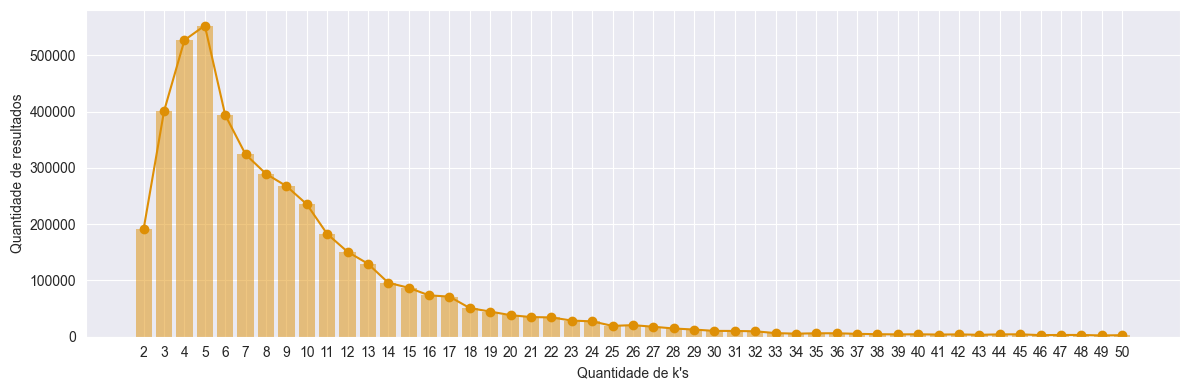

In [137]:
plot_bars_results(counts=get_count_from_file("data/k_twitter_2s_1-50_count.json"), ignore_first_ks=1)

alpha: -2.861173640769806, beta: 18.933701762722748


(1, 50)

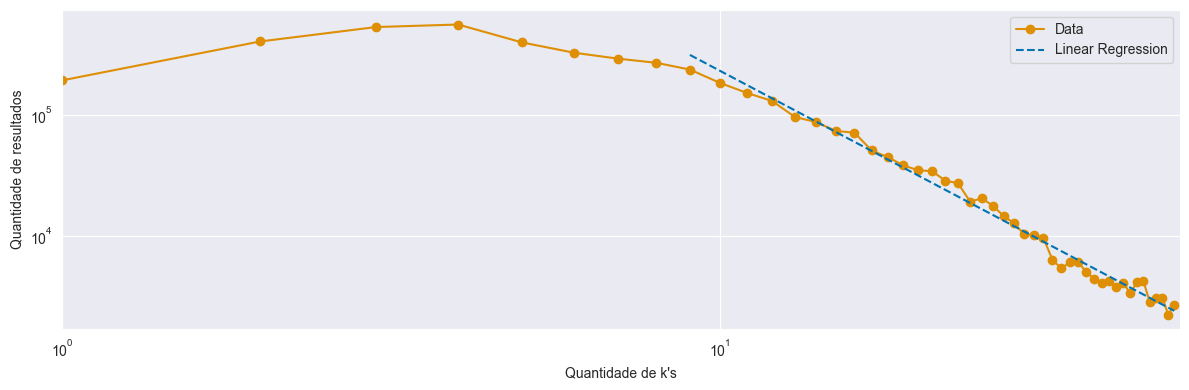

In [145]:
plot_logscale_results(counts=get_count_from_file("data/k_twitter_2s_1-50_count.json"), ignore_first_ks=1)

plt.xlim((1, 50))

In [8]:
data = get_count_from_file("data/k_twitter_2s_1-50.pkl")
data = np.mean(data, axis=1)
data

array([7.9700e+06, 1.8700e+05, 3.8800e+05, 5.2700e+05, 5.1600e+05,
       3.7900e+05, 3.2500e+05, 3.1300e+05, 2.3450e+05, 2.2400e+05,
       1.8800e+05, 1.5700e+05, 1.3750e+05, 1.0195e+05, 9.0100e+04,
       7.7600e+04, 7.0800e+04, 5.0250e+04, 4.1000e+04, 3.8700e+04,
       3.5700e+04, 3.0800e+04, 2.9800e+04, 2.9900e+04, 1.8400e+04,
       1.9600e+04, 1.7600e+04, 1.4000e+04, 1.0700e+04, 1.1000e+04,
       1.0500e+04, 1.0180e+04, 6.5550e+03, 5.4300e+03, 6.5400e+03,
       6.6500e+03, 4.8600e+03, 4.2300e+03, 4.2900e+03, 4.8500e+03,
       4.1900e+03, 4.3400e+03, 3.0600e+03, 3.8600e+03, 3.8750e+03,
       2.7100e+03, 3.3700e+03, 3.6000e+03, 2.1950e+03, 2.8350e+03])

In [29]:
fit = pwl.Fit(data)
print(f"alpha: {fit.alpha}, xmin: {fit.xmin}, c: {fit.sigma}")

Calculating best minimal value for power law fit
alpha: 2.2615005214824704, xmin: 187000.0, c: 0.3803567184177296


Text(0, 0.5, 'Frequência')

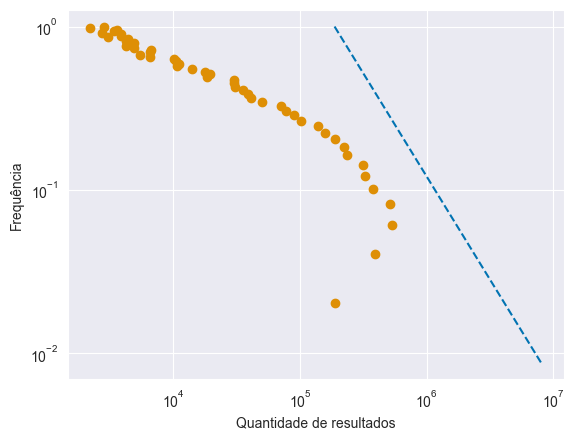

In [33]:
# pwl.plot_ccdf(data, color="C1", marker='o', label="Data")
fit.power_law.plot_ccdf(color="C0", linestyle="--", label="Power Law")

# fit.plot_ccdf(color="C1", marker='o', label="Data")
plt.scatter(data, np.linspace(0, len(data)/50, 50), color="C1", marker='o')
plt.yscale('log')
plt.xscale('log')
plt.xlabel("Quantidade de resultados")
plt.ylabel("Frequência")

Calculating best minimal value for power law fit


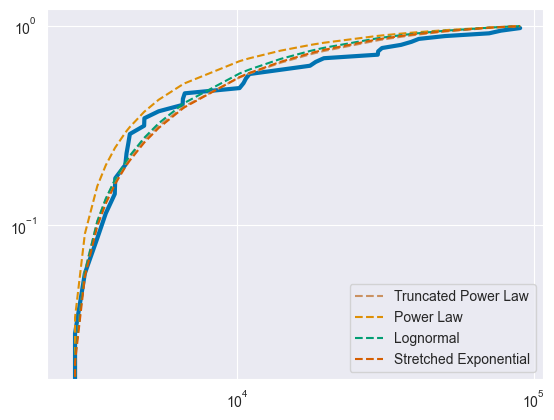

In [134]:
fit = pwl.Fit(data[1:], xmax=10**5)
fig = fit.plot_cdf(linewidth=3)
fit.truncated_power_law.plot_cdf(ax=fig, linestyle="--", color="C5", label="Truncated Power Law")
fit.power_law.plot_cdf(ax=fig, linestyle="--", color="C1", label="Power Law")
fit.lognormal.plot_cdf(ax=fig, linestyle="--", color="C2", label="Lognormal")
fit.stretched_exponential.plot_cdf(ax=fig, linestyle="--", color="C3", label="Stretched Exponential")
plt.legend()

In [132]:
pwl.Truncated_Power_Law

powerlaw.Truncated_Power_Law

In [124]:
# Fit data to power law distribution
fit = pwl.Fit(data[1:])

# Get estimated exponent of power law distribution
alpha = fit.alpha

# Perform goodness-of-fit test
D, p = fit.distribution_compare('truncated_power_law', 'lognormal')

print(f"Estimated exponent: {alpha}")
print(f"Distribution compare - Power law vs Lognormal: D = {D}, p = {p}")

Calculating best minimal value for power law fit
Estimated exponent: 1.41582868916091
Distribution compare - Power law vs Lognormal: D = 2.476399563514331, p = 0.006006696146798701
